# 39 组合总和
输入：无重复元素的数组 candidates 和一个目标数字 target   
输出：数组中所有可以使数字之和维target的组合

ps：数组中的数字可以无限制重复选取，数组中元素的范围[1,200]

## 思路
本题和之前的组合总和不一样的是没有规定组成target的数字个数要求，满足数字和 == target 即可 

所以for循环横向遍历的是数组中的每一个元素  
递归纵向遍历的层数取决于 sum 是否等于 target  

## 回溯三部曲
1. 参数和返回值
   - 全局参数：path 和 result
   - 其他参数：统计path中元素的和sum，目标值target，每次递归取元素的起始索引startIndex  
   - ps：这里的sum也可以不用，使用target每次减去搜索到的元素直到target==0即可（很重要的相减思想！）

2. 终止条件：
   - 有sum： 判断 sum == target 保存结果并返回！sum > target 直接返回 

3. 单层递归逻辑
   - 从startIndex开始，搜索数组，单次回溯的递归函数中不用从 i+1 开始了  

## 剪枝
对于sum已经大于target的情况，可以直接结束本轮for循环的遍历（排序后的数组）  
排序 + 剪枝  

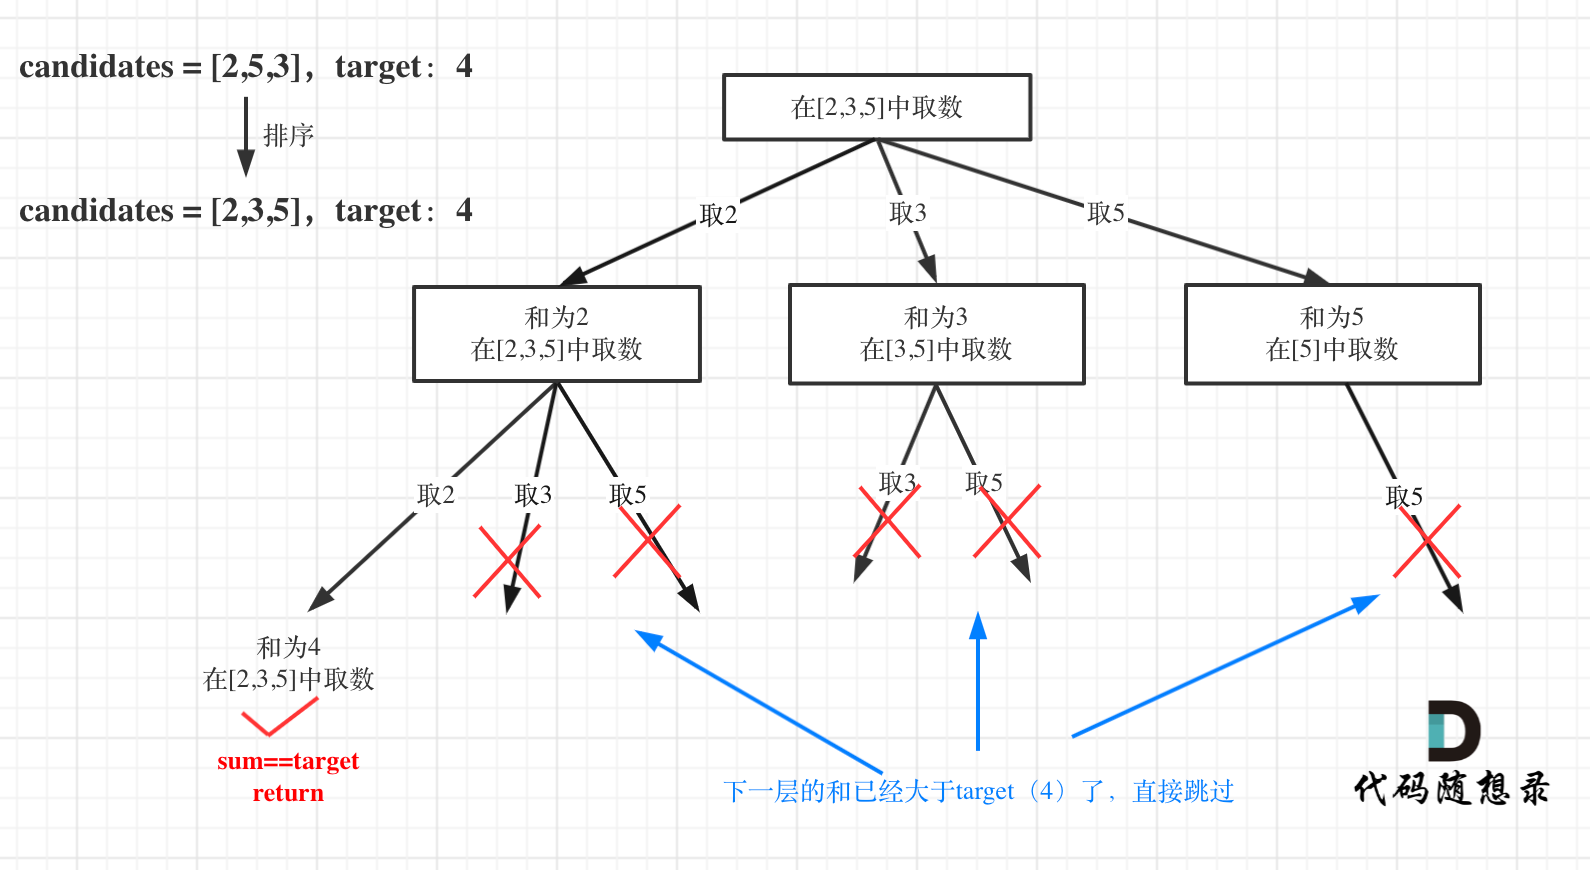  


In [ ]:
# 不用sum，无剪枝
class Solution:
    def combinationSum(self, candidates, target):
        result = []
        self.backtracing(candidates, target, 0, [], result)
        return result
    
    def backtracing(self, candidates, target, startIndex, path, result):
        if target == 0:
            result.append(path[:])
            return
        if target < 0:
            return
        for i in range(startIndex, len(candidates)):
            path.append(candidates[i])  # 处理
            self.backtracing(candidates, target - candidates[i], i, path, result)  # 下一次搜索的目标值为target - candidates[i]，而且无需 i+1，可以重复
            path.pop  # 回溯

In [ ]:
# 无sum，加剪枝版
class Solution:
    def combinationSum(self, candidates, target):
        result = []
        candidates.sort()  # 原地排序
        self.backtracing(candidates, target, 0, [], result)
        return result
    
    def backtracing(self, candidates, target, startIndex. path, result):
        if target == 0:
            result.append(path[:])
            return
        
        for i in range(startIndex, len(candidates)):
            # 剪枝
            if target - candidates[i] < 0:
                break
            path.append(candidates[i])  # 处理
            self.backtracing(candidates, target - candidates[i], i, path, result)  # 递归
            path.pop()   # 回溯撤销